# UNDER CONSTRUCTION

# Description

This notebook calculates the binomial confidence of a given hypothsized single trial success probability ```p_success_hypothesis``` given the number of tests conducted ```n_trials``` and the number of successful tests ```n_successes``` out of these.

This tells you how confident you can be that the real success probability of a single test is ```p_success_hypothesis``` or better, and that you didn't just get ```n_successes``` out of ```n_trials``` by getting lucky and the real single test success probability (the one you would measure if you ran an infinite number of tests) being lower than your desired ```p_success_hypothesis```.

In addition to that the notebook produces a graph that tells you how confident you can be that the real single test success probability assumes any of the possible values between 0 (every test will fail) and 1 (no test will fail).

__Note__
1. All probabilities are given as numbers between 0 and 1, where 0 represents "never" and 1 represents 100% certainty.
2. The calculated confidences are conservative, i.e., the coverage of this hypothesis test is that of the reported confidence or higher. That means if you use this notebook for multiple trials, and it yields a confidence of 95% or more every time, then you should expect the true single trial success rate to be worse than ```p_success_hypothesis``` in 1/20 trials on average in the worst-case.

# Parameters

In [8]:
test_duration = 1 #measure of how long the test was run [km, hours, ...]
n_events = 0 #number of events observed during test_duration
r_hypothesis = 0.333 #hypothesized upper limit for occurence rate of the relevant event [#/km, #/hour, ...]

round_to_digits = 4

# Evaluation

In [9]:
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np

mp.mp.dps = 50 #use 50 decimal digits precision in mpmath calculations

def poisson_distr(n_events, r_event, test_duration):
    return mp.power(mp.mpf(r_event*test_duration), n_events) / mp.fac(n_events) * mp.exp(-r_event*test_duration)

poisson_distr_vectorized = np.vectorize(poisson_distr) #create version of poisson distribution that can be evaluated for whole lists of inputs

def poisson_confidence(n_events, r_hypothesis, test_duration):
    return poisson_distr_vectorized(np.arange(0, n_events+1), r_hypothesis, test_duration).sum()

null_hypothesis_confidence = poisson_confidence(n_events, r_hypothesis, test_duration)
hypothesis_confidence = 1-null_hypothesis_confidence

null_hypothesis_confidence_rounded = mp.nstr(null_hypothesis_confidence, round_to_digits)
hypothesis_confidence_rounded = mp.nstr(hypothesis_confidence, round_to_digits)

print('Your test had a duration of {} during which you observed {} events'.format(test_duration, n_events))
print('The probability of getting {} or fewer events despite the occurance rate of said event being {} or higher is {}'.format(n_events, r_hypothesis, null_hypothesis_confidence_rounded))
print('Thefore, the confidence is {} that the success probability of a single test is at least {}'.format(hypothesis_confidence_rounded, r_hypothesis))

Your test had a duration of 1 during which you observed 0 events
The probability of getting 0 or fewer events despite the occurance rate of said event being 0.333 or higher is 0.7168
Thefore, the confidence is 0.2832 that the success probability of a single test is at least 0.333


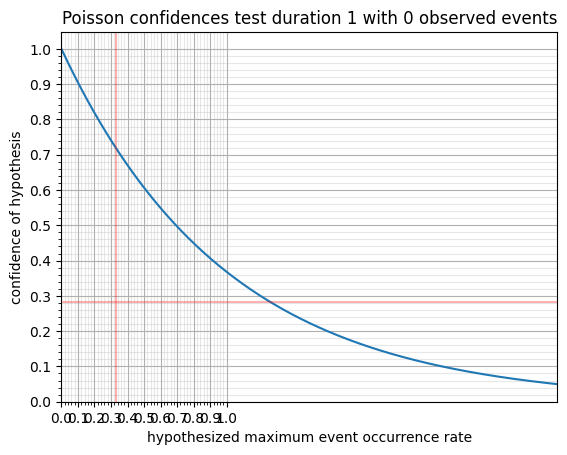

In [14]:
#create version of poisson confidence that can be evaluated for whole lists of hypothetical occurrence rates
poisson_confidence_vectorized = np.vectorize(poisson_confidence)

x = np.linspace(0, 3, 1001) #list of possible single trial success probabilities. increase the number of samples here if the plot needs it
C_x = poisson_confidence_vectorized(n_events, x, test_duration) #probabilities of each of these hypotheses

#plot
plt.plot(x, C_x)
plt.axvline(r_hypothesis, 0, 1, color='red', alpha=0.3)
plt.axhline(hypothesis_confidence, 0, 1, color='red', alpha=0.3)

plt.gca().set_title('Poisson confidences test duration {} with {} observed events'.format(test_duration, n_events))
plt.gca().set_xlabel('hypothesized maximum event occurrence rate')
plt.gca().set_ylabel('confidence of hypothesis')
plt.gca().tick_params(axis='x', which='minor', bottom=True)
plt.gca().set_xticks(np.linspace(0, 1, 11), minor=False)
plt.gca().set_xticks(np.linspace(0, 1, 51), minor=True)
plt.gca().set_yticks(np.linspace(0, 1, 11), minor=False)
plt.gca().set_yticks(np.linspace(0, 1, 51), minor=True)
plt.grid(which='major')
plt.grid(which='minor', alpha=0.3);

plt.gca().set_xlim([0, 3]); #change plot range here